In [1]:
%matplotlib inline
import matplotlib
print('matplotlib version:', matplotlib.__version__)
import matplotlib.pyplot as plt

import numpy as np
print('numpy version', np.__version__)
from numpy import median

import pandas as pd
print('pandas version:', pd.__version__)
from pandas import ExcelWriter
from pandas import ExcelFile

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols #加载ols模型
from statsmodels.formula.api import poisson
print('statsmodels version:', sm.__version__)

import dowhy
from dowhy import CausalModel
import dowhy.datasets
print('dowhy version:', dowhy.__version__)

# Avoiding unnecessary log messges and warnings
import logging
logging.getLogger("dowhy").setLevel(logging.WARNING)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

print('Concact: Zehua Zeng (starlitnightly@163.com)')

matplotlib version: 3.5.1
numpy version 1.22.4
pandas version: 1.4.3
statsmodels version: 0.13.2
dowhy version: 0.7.1
Concact: Zehua Zeng (starlitnightly@163.com)


In [3]:
from matplotlib.colors import LinearSegmentedColormap

# cmap
emosa_colors = ['#FCEFE4','#FC7E0A']
emosa_cmap = LinearSegmentedColormap.from_list('custom',emosa_colors)

beta_colors = ['#F4E8FF','#7F00FF']
beta_cmap = LinearSegmentedColormap.from_list('custom',beta_colors)

smad_colors = ['#FFDFFF','#FF00FE']
smad_cmap = LinearSegmentedColormap.from_list('custom',smad_colors)

In [4]:
import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.4.3 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [7]:
fish_data=pd.read_csv('data/fish_data.csv')
fish_data.head()

,Time,A,B,C,ndr1,ndr2,treatment
0,3.7,1,1,1,9166.98,4351.54,1
1,3.7,1,1,0,7525.59,4074.69,0
2,4.0,1,1,1,11753.21,6031.75,1
3,4.0,1,1,0,8580.33,6099.13,0
4,4.3,1,1,1,13392.53,10041.42,1


In [8]:
set(fish_data['Time'])

# ndr1

In [9]:
from patsy import dmatrices
y, X = dmatrices('ndr1 ~ A+B+C', data=fish_data.loc[fish_data['Time']==3.7], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr1   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     23.00
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0420
Time:                        01:49:35   Log-Likelihood:                -42.592
No. Observations:                   6   AIC:                             93.18
Df Residuals:                       2   BIC:                             92.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1813.0488    654.861      2.769      0.1

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [10]:
from patsy import dmatrices
y, X = dmatrices('ndr1 ~ A+B+C', data=fish_data.loc[fish_data['Time']==4], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr1   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     9.630
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0955
Time:                        01:49:37   Log-Likelihood:                -46.245
No. Observations:                   6   AIC:                             100.5
Df Residuals:                       2   BIC:                             99.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2060.5477   1203.832      1.712      0.2

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [11]:
from patsy import dmatrices
y, X = dmatrices('ndr1 ~ A+B+C', data=fish_data.loc[fish_data['Time']==4.3], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr1   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     13.67
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0689
Time:                        01:49:38   Log-Likelihood:                -47.225
No. Observations:                   6   AIC:                             102.5
Df Residuals:                       2   BIC:                             101.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2845.5176   1417.464      2.007      0.1

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [12]:
from patsy import dmatrices
y, X = dmatrices('ndr1 ~ A+B+C', data=fish_data.loc[fish_data['Time']==4.7], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr1   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     9.808
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0939
Time:                        01:49:39   Log-Likelihood:                -50.174
No. Observations:                   6   AIC:                             108.3
Df Residuals:                       2   BIC:                             107.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3129.8893   2317.215      1.351      0.3

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [13]:
from patsy import dmatrices
y, X = dmatrices('ndr1 ~ A+B+C', data=fish_data.loc[fish_data['Time']==5.0], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr1   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     8.454
Date:                Wed, 05 Oct 2022   Prob (F-statistic):              0.108
Time:                        01:49:40   Log-Likelihood:                -50.491
No. Observations:                   6   AIC:                             109.0
Df Residuals:                       2   BIC:                             108.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7513.3900   2442.904      3.076      0.0

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [14]:
from patsy import dmatrices
y, X = dmatrices('ndr1 ~ A+B+C', data=fish_data.loc[fish_data['Time']==6.0], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr1   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     6.445
Date:                Wed, 05 Oct 2022   Prob (F-statistic):              0.137
Time:                        01:49:43   Log-Likelihood:                -49.505
No. Observations:                   6   AIC:                             107.0
Df Residuals:                       2   BIC:                             106.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6720.3810   2072.570      3.243      0.0

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# ndr2

In [13]:
from patsy import dmatrices
y, X = dmatrices('ndr2 ~ A+B+C', data=fish_data.loc[fish_data['Time']==3.7], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr2   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     483.6
Date:                Thu, 28 Jul 2022   Prob (F-statistic):            0.00206
Time:                        20:09:32   Log-Likelihood:                -30.558
No. Observations:                   6   AIC:                             69.12
Df Residuals:                       2   BIC:                             68.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1392.0812     88.128     15.796      0.0

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [14]:
from patsy import dmatrices
y, X = dmatrices('ndr2 ~ A+B+C', data=fish_data.loc[fish_data['Time']==4], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr2   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     26.90
Date:                Thu, 28 Jul 2022   Prob (F-statistic):             0.0361
Time:                        20:09:38   Log-Likelihood:                -43.022
No. Observations:                   6   AIC:                             94.04
Df Residuals:                       2   BIC:                             93.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    524.3357    703.505      0.745      0.5

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [15]:
from patsy import dmatrices
y, X = dmatrices('ndr2 ~ A+B+C', data=fish_data.loc[fish_data['Time']==4.3], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr2   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     87.98
Date:                Thu, 28 Jul 2022   Prob (F-statistic):             0.0113
Time:                        20:09:43   Log-Likelihood:                -42.388
No. Observations:                   6   AIC:                             92.78
Df Residuals:                       2   BIC:                             91.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2997.2040    632.962      4.735      0.0

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [16]:
from patsy import dmatrices
y, X = dmatrices('ndr2 ~ A+B+C', data=fish_data.loc[fish_data['Time']==4.7], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr2   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     8.202
Date:                Thu, 28 Jul 2022   Prob (F-statistic):              0.111
Time:                        20:09:46   Log-Likelihood:                -52.630
No. Observations:                   6   AIC:                             113.3
Df Residuals:                       2   BIC:                             112.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1058.5727   3489.257      0.303      0.7

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [17]:
from patsy import dmatrices
y, X = dmatrices('ndr2 ~ A+B+C', data=fish_data.loc[fish_data['Time']==5.0], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr2   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2.066
Date:                Thu, 28 Jul 2022   Prob (F-statistic):              0.343
Time:                        20:09:50   Log-Likelihood:                -54.020
No. Observations:                   6   AIC:                             116.0
Df Residuals:                       2   BIC:                             115.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1551.9160   4399.075      0.353      0.7

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [107]:
from patsy import dmatrices
y, X = dmatrices('ndr2 ~ A+B+C', data=fish_data.loc[fish_data['Time']==6.0], return_type="dataframe")
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndr2   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     2.811
Date:                Sat, 30 Jul 2022   Prob (F-statistic):              0.273
Time:                        10:27:45   Log-Likelihood:                -53.230
No. Observations:                   6   AIC:                             114.5
Df Residuals:                       2   BIC:                             113.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    808.1401   3855.972      0.210      0.8

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# ndr1

In [15]:
res_pd=pd.DataFrame(columns=['params','coef','pvalue','time'])
for i in [3.7,4.0,4.3,4.7,5.0,6.0]:
    res_test=pd.DataFrame()
    y, X = dmatrices('ndr1 ~ A+B+C', data=fish_data.loc[fish_data['Time']==i], return_type="dataframe")
    model = sm.OLS(y, X)
    res = model.fit()
    res_test['params']=['Intercept','A','B','C']
    res_test['coef']=res.params.values
    res_test['pvalue']=res.pvalues.values
    res_test['time']=[t for t in [i]*4]
    res_pd=pd.concat([res_pd,res_test],ignore_index=True)

In [16]:
res_pd.head()

,params,coef,pvalue,time
0,Intercept,1813.048844,0.109455,3.7
1,A,2030.346245,0.057122,3.7
2,B,4090.756824,0.015030,3.7
3,C,824.266175,0.184849,3.7
4,Intercept,2060.547703,0.229090,4.0


In [17]:
def value_analysis(A,B,C,inter):
    A_adj=A/1000
    B_adj=B/1000
    C_adj=C/1000
    all_adj=[]
    
    all_min=np.min(np.array([A_adj,B_adj,C_adj]))
    for i in range(len(A_adj)):
        all_test=np.array([A_adj[i],B_adj[i],C_adj[i]])
        all_max=np.max(all_test)
        all_test=(all_test-all_min)
        all_adj.append(all_test)
    return all_adj

In [18]:
def value_analysis1(A,B,C):
    A_adj=A/1000
    B_adj=B/1000
    C_adj=C/1000
    all_adj=[]
    
    all_min=np.min(np.array([A_adj,B_adj,C_adj]))
    for i in range(len(A_adj)):
        all_test=np.array([A_adj[i],B_adj[i],C_adj[i]])
        all_max=np.max(all_test)
        all_test=(all_test-all_min)
        all_sum=np.sum(all_test)
        a1=[i/all_sum for i in all_test]
        all_adj.append(a1)
    return all_adj

In [20]:
def value_analysis2(data,pvalue=0.2):
    result_pd=pd.DataFrame(columns=['params','prop','pvalue','time'])
    data['coef']=data['coef']-data['coef'].min()
    for i in set(data['time']):
        new_pd=pd.DataFrame()
        test_pd=data.loc[(data['time']==i)&(data['params']!='Intercept')]
        test_pd.loc[test_pd['pvalue']>pvalue,'coef']=0
        su=test_pd.loc[:,'coef'].sum()

        new_pd['params']=test_pd.loc[:,'params'].values
        new_pd['prop']=(test_pd.loc[:,'coef'].values/su)
        new_pd['pvalue']=test_pd.loc[:,'pvalue'].values
        new_pd['time']=[t for t in [i]*3]
        
        result_pd=pd.concat([result_pd,new_pd])
    return result_pd
#value_analysis2(res_pd)

In [21]:
all_adj=value_analysis(res_pd.loc[(res_pd['params']=='A')]['coef'].values,
               res_pd.loc[(res_pd['params']=='B')]['coef'].values,
               res_pd.loc[(res_pd['params']=='C')]['coef'].values,
               res_pd.loc[(res_pd['params']=='Intercept')]['coef'].values,
              )
np.array(all_adj)[:,0]

array([7.45082289, 8.28637987, 8.35764039, 8.16010905, 1.31275614,
       0.        ])

In [22]:
all_adj1=value_analysis1(res_pd.loc[(res_pd['params']=='A')]['coef'].values,
               res_pd.loc[(res_pd['params']=='B')]['coef'].values,
               res_pd.loc[(res_pd['params']=='C')]['coef'].values,
               
              )
np.array(all_adj1)[:,0]

array([0.32106207, 0.32564816, 0.32114723, 0.294066  , 0.07287956,
       0.        ])

/var/folders/4m/2xw3_2s503s9r616083n7w440000gn/T/ipykernel_48563/1778812987.py:66: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cmap,cax=axins,label='-log10(Pvalue)')


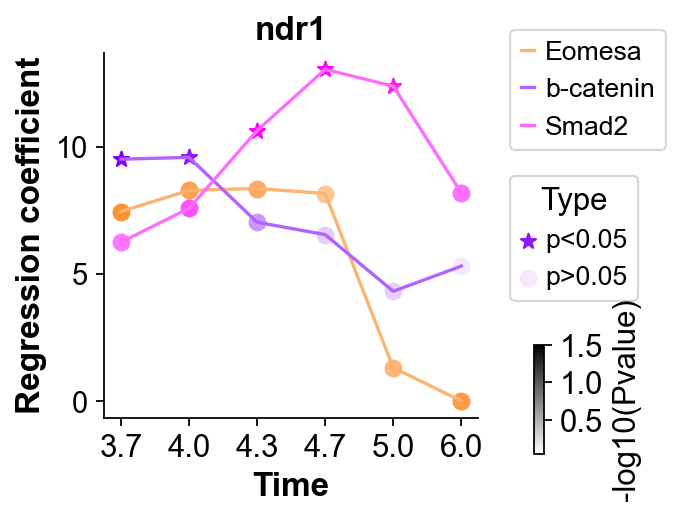

In [23]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import matplotlib.patches as mpatches
#pp=plt.figure(figsize=(4,4))
#用ax控制图片
#ax=pp.add_subplot(1,1,1)

fig, ax = plt.subplots(1, 1, figsize=[3,3])

plot_t=res_pd.loc[(res_pd['params']=='A')]
for xp, yp, m,c in zip(range(6),np.array(all_adj)[:,0], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=emosa_cmap,vmin=0.05,vmax=1.5,)
plt.plot(range(6),np.array(all_adj)[:,0],color='#FCB471',label='Eomesa')

plot_t=res_pd.loc[(res_pd['params']=='B')]
for xp, yp, m,c in zip(range(6),np.array(all_adj)[:,1], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    if m=='*':
        s=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=beta_cmap,vmin=0.05,vmax=1.5,)
    elif m=='o':
        s1=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=beta_cmap,vmin=0.05,vmax=1.5,)
plt.plot(range(6),np.array(all_adj)[:,1],color='#B063FF',label='b-catenin')

plot_t=res_pd.loc[(res_pd['params']=='C')]
for xp, yp, m,c in zip(range(6),np.array(all_adj)[:,2], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=smad_cmap,vmin=0.05,vmax=1.5,)
plt.plot(range(6),np.array(all_adj)[:,2],color='#FF6CFE',label='Smad2')
plt.grid(False)

legend1=ax.legend(bbox_to_anchor=(1.05, 1.1), ncol=1,fontsize=12)
ax.add_artist(legend1)


names=['p<0.05','p>0.05']
legend2 = ax.legend([s,s1], names,bbox_to_anchor=(1.05, 0.7), ncol=1,fontsize=12,title='Type')

#绘制图像标题
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('ndr1',fontsize=15,fontweight='bold')

#设置横纵标题
plt.ylabel('Regression coefficient',fontsize=15,fontweight='bold')                   
plt.xlabel('Time',fontsize=15,fontweight='bold')

plt.xticks(range(6),[3.7,4.0,4.3,4.7,5.0,6.0],fontsize=14)
plt.yticks(fontsize=13)

axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="30%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.15, -0.1, 0.5, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
norm = mpl.colors.Normalize(vmin=0.05, vmax=1.5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='gray_r')
cmap.set_array([])
fig.colorbar(cmap,cax=axins,label='-log10(Pvalue)')
plt.savefig("result/Fig_ndr1_4.png",dpi=300,bbox_inches = 'tight')

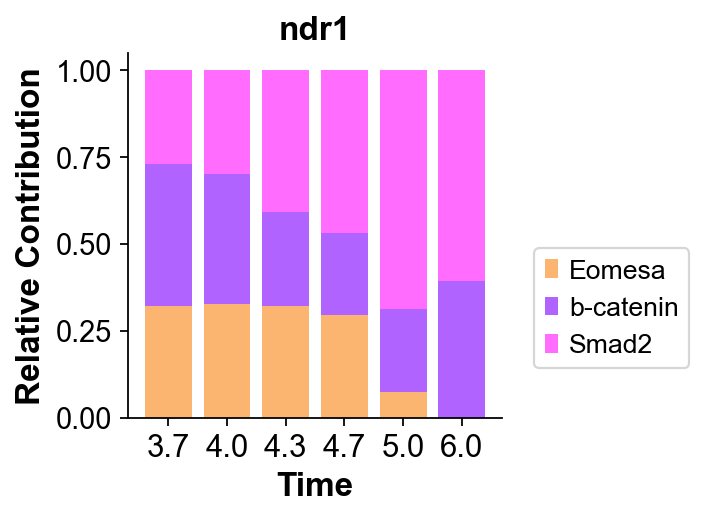

In [24]:
fig, ax = plt.subplots(1, 1, figsize=[3,3])
plt.bar(range(6), 
        np.array(all_adj1)[:,0],
        bottom=np.zeros(len(plot_t['time'])),
        label='Eomesa',width=0.8,#edgecolor='black',
        fc = '#FCB471')

plt.bar(range(6), 
        np.array(all_adj1)[:,1],
        bottom=np.array(all_adj1)[:,0],
        label='b-catenin',width=0.8,#edgecolor='black',
        fc = '#B063FF')

plt.bar(range(6), 
        np.array(all_adj1)[:,2],
        bottom=np.array(all_adj1)[:,0]+np.array(all_adj1)[:,1],
        label='Smad2',width=0.8,#edgecolor='black',
        fc = '#FF6CFE')


plt.legend(bbox_to_anchor=(1.05, 0.5), ncol=1,fontsize=12)

plt.grid(False)

#绘制图像标题
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('ndr1',fontsize=15,fontweight='bold')

#设置横纵标题
plt.ylabel('Relative Contribution',fontsize=15,fontweight='bold')                   
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.xticks(range(6),[3.7,4.0,4.3,4.7,5.0,6.0],fontsize=14)
plt.yticks(fontsize=13)
plt.savefig("result/Fig_ndr1_2.png",dpi=300,bbox_inches = 'tight')

# ndr2

In [25]:
res_pd=pd.DataFrame(columns=['params','coef','pvalue','time'])
for i in [3.7,4.0,4.3,4.7,5.0,6.0]:
    res_test=pd.DataFrame()
    y, X = dmatrices('ndr2 ~ A+B+C', data=fish_data.loc[fish_data['Time']==i], return_type="dataframe")
    model = sm.OLS(y, X)
    res = model.fit()
    res_test['params']=['Intercept','A','B','C']
    res_test['coef']=res.params.values
    res_test['pvalue']=res.pvalues.values
    res_test['time']=[t for t in [i]*4]
    res_pd=pd.concat([res_pd,res_test],ignore_index=True)

In [26]:
all_adj=value_analysis(res_pd.loc[(res_pd['params']=='A')]['coef'].values,
               res_pd.loc[(res_pd['params']=='B')]['coef'].values,
               res_pd.loc[(res_pd['params']=='C')]['coef'].values,
               res_pd.loc[(res_pd['params']=='Intercept')]['coef'].values,
              )
np.array(all_adj)[:,0]

array([ 3.28642675,  5.52112637,  7.04594512, 12.64432555,  7.4259321 ,
        2.43408888])

In [27]:
all_adj1=value_analysis1(res_pd.loc[(res_pd['params']=='A')]['coef'].values,
               res_pd.loc[(res_pd['params']=='B')]['coef'].values,
               res_pd.loc[(res_pd['params']=='C')]['coef'].values,
               #res_pd.loc[(res_pd['params']=='Intercept')]['coef'].values,
              )
np.array(all_adj1)[:,0]

array([0.58866131, 0.67401135, 0.72767725, 0.72062473, 0.45790094,
       0.17619977])

/var/folders/4m/2xw3_2s503s9r616083n7w440000gn/T/ipykernel_48563/2607685284.py:66: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cmap,cax=axins,label='-log10(Pvalue)')


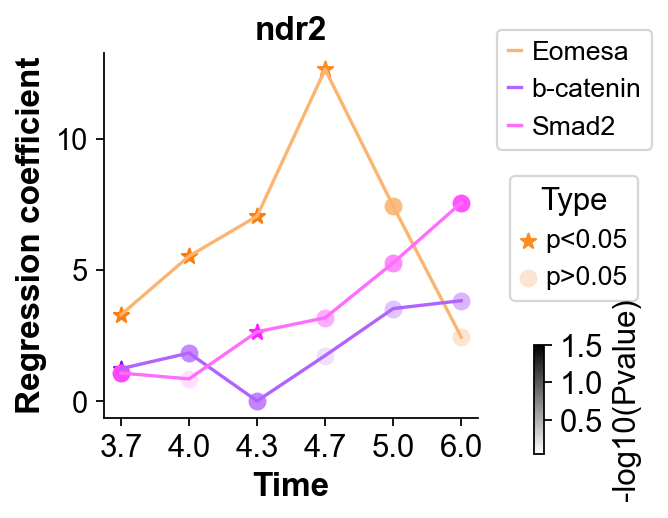

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import matplotlib.patches as mpatches
#pp=plt.figure(figsize=(4,4))
#用ax控制图片
#ax=pp.add_subplot(1,1,1)

fig, ax = plt.subplots(1, 1, figsize=[3,3])

plot_t=res_pd.loc[(res_pd['params']=='A')]
for xp, yp, m,c in zip(range(6),np.array(all_adj)[:,0], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    if m=='*':
        s=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=emosa_cmap,vmin=0.05,vmax=1.5,)
    elif m=='o':
        s1=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=emosa_cmap,vmin=0.05,vmax=1.5,)
plt.plot(range(6),np.array(all_adj)[:,0],color='#FCB471',label='Eomesa')

plot_t=res_pd.loc[(res_pd['params']=='B')]
for xp, yp, m,c in zip(range(6),np.array(all_adj)[:,1], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=beta_cmap,vmin=0.05,vmax=1.5,)
plt.plot(range(6),np.array(all_adj)[:,1],color='#B063FF',label='b-catenin')

plot_t=res_pd.loc[(res_pd['params']=='C')]
for xp, yp, m,c in zip(range(6),np.array(all_adj)[:,2], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=smad_cmap,vmin=0.05,vmax=1.5,)
plt.plot(range(6),np.array(all_adj)[:,2],color='#FF6CFE',label='Smad2')
plt.grid(False)

legend1=ax.legend(bbox_to_anchor=(1.5, 1.1), ncol=1,fontsize=12)
ax.add_artist(legend1)


names=['p<0.05','p>0.05']
legend2 = ax.legend([s,s1], names,bbox_to_anchor=(1.05, 0.7), ncol=1,fontsize=12,title='Type')

#绘制图像标题
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('ndr2',fontsize=15,fontweight='bold')

#设置横纵标题
plt.ylabel('Regression coefficient',fontsize=15,fontweight='bold')                   
plt.xlabel('Time',fontsize=15,fontweight='bold')

plt.xticks(range(6),[3.7,4.0,4.3,4.7,5.0,6.0],fontsize=14)
plt.yticks(fontsize=13)

axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="30%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.15, -.1, 0.5, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
norm = mpl.colors.Normalize(vmin=0.05, vmax=1.5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='gray_r')
cmap.set_array([])
fig.colorbar(cmap,cax=axins,label='-log10(Pvalue)')
plt.savefig("result/Fig_ndr2_4.png",dpi=300,bbox_inches = 'tight')

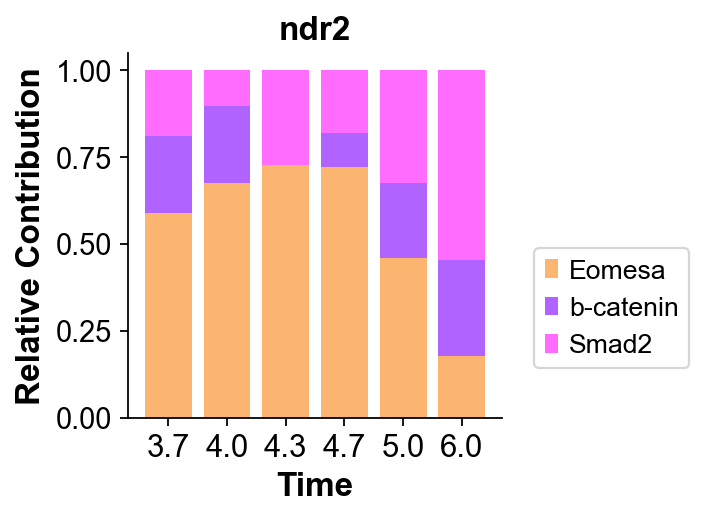

In [29]:
fig, ax = plt.subplots(1, 1, figsize=[3,3])
plt.bar(range(6), 
        np.array(all_adj1)[:,0],
        bottom=np.zeros(len(plot_t['time'])),
        label='Eomesa',width=0.8,#edgecolor='black',
        fc = '#FCB471')

plt.bar(range(6), 
        np.array(all_adj1)[:,1],
        bottom=np.array(all_adj1)[:,0],
        label='b-catenin',width=0.8,#edgecolor='black',
        fc = '#B063FF')

plt.bar(range(6), 
        np.array(all_adj1)[:,2],
        bottom=np.array(all_adj1)[:,0]+np.array(all_adj1)[:,1],
        label='Smad2',width=0.8,#edgecolor='black',
        fc = '#FF6CFE')


plt.legend(bbox_to_anchor=(1.05, 0.5), ncol=1,fontsize=12)

plt.grid(False)

#绘制图像标题
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('ndr2',fontsize=15,fontweight='bold')

#设置横纵标题
plt.ylabel('Relative Contribution',fontsize=15,fontweight='bold')                   
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.xticks(range(6),[3.7,4.0,4.3,4.7,5.0,6.0],fontsize=14)
plt.yticks(fontsize=13)
plt.savefig("result/Fig_ndr2_2.png",dpi=300,bbox_inches = 'tight')

In [431]:
res_pd=pd.DataFrame(columns=['params','coef','pvalue','time'])
for i in [3.7,4.0,4.3,4.7,5.0,6.0]:
    res_test=pd.DataFrame()
    y, X = dmatrices('ndr1 ~ B+C', data=fish_data.loc[fish_data['Time']==i], return_type="dataframe")
    model = sm.OLS(y, X)
    res = model.fit()
    res_test['params']=['Intercept','B','C']
    res_test['coef']=res.params.values
    res_test['pvalue']=res.pvalues.values
    res_test['time']=[t for t in [i]*3]
    res_pd=pd.concat([res_pd,res_test],ignore_index=True)
res_pd

,params,coef,pvalue,time
0,Intercept,3843.395089,0.032306,3.7
1,B,3075.583701,0.064760,3.7
2,C,824.266175,0.476236,3.7
3,Intercept,4926.450932,0.045302,4.0
4,B,2729.213690,0.182026,4.0
5,C,2156.307528,0.242948,4.0
6,Intercept,5782.681307,0.034463,4.3
7,B,141.722353,0.937386,4.3
8,C,5215.428932,0.044717,4.3
9,Intercept,5869.521672,0.044593,4.7


In [432]:
def value_analysis3(A,B,inter):
    A_adj=A/1000
    B_adj=B/1000
    all_adj=[]
    
    all_min=np.min(np.array([A_adj,B_adj]))
    for i in range(len(A_adj)):
        all_test=np.array([A_adj[i],B_adj[i]])
        all_max=np.max(all_test)
        all_test=(all_test-all_min)
        all_adj.append(all_test)
    return all_adj

In [433]:
def value_analysis4(A,B):
    A_adj=A/1000
    B_adj=B/1000

    all_adj=[]
    
    all_min=np.min(np.array([A_adj,B_adj]))
    for i in range(len(A_adj)):
        all_test=np.array([A_adj[i],B_adj[i]])
        all_max=np.max(all_test)
        all_test=(all_test-all_min)
        all_sum=np.sum(all_test)
        a1=[i/all_sum for i in all_test]
        all_adj.append(a1)
    return all_adj

In [434]:
all_adj=value_analysis3(res_pd.loc[(res_pd['params']=='B')]['coef'].values,
               res_pd.loc[(res_pd['params']=='C')]['coef'].values,
               res_pd.loc[(res_pd['params']=='Intercept')]['coef'].values,
              )
np.array(all_adj)[:,0]

array([3.32207489, 2.97570488, 0.38821354, 0.        , 1.19542219,
       2.83992458])

In [435]:
all_adj1=value_analysis4(res_pd.loc[(res_pd['params']=='B')]['coef'].values,
               res_pd.loc[(res_pd['params']=='C')]['coef'].values,
              )
np.array(all_adj1)[:,0]

array([0.75624897, 0.55325888, 0.06635977, 0.        , 0.14221375,
       0.48518375])

/var/folders/4m/2xw3_2s503s9r616083n7w440000gn/T/ipykernel_2169/2908348217.py:66: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cmap,cax=axins,label='-log10(Pvalue)')


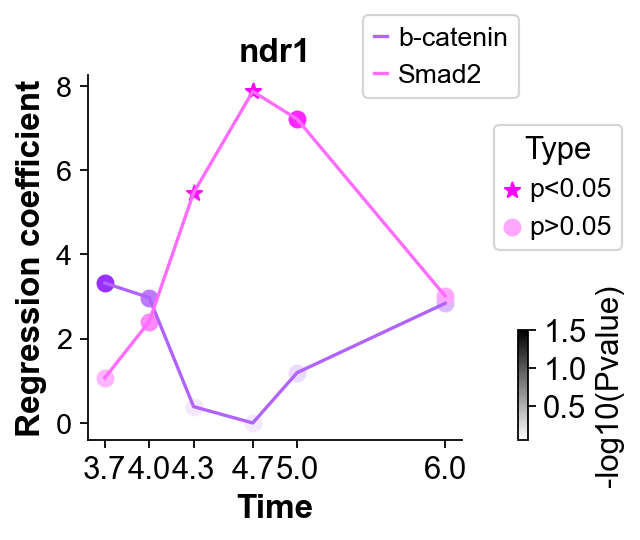

In [441]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import matplotlib.patches as mpatches
#pp=plt.figure(figsize=(4,4))
#用ax控制图片
#ax=pp.add_subplot(1,1,1)

fig, ax = plt.subplots(1, 1, figsize=[3,3])

plot_t=res_pd.loc[(res_pd['params']=='B')]
for xp, yp, m,c in zip(plot_t['time'],np.array(all_adj)[:,0], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    if m=='*':
        s=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=beta_cmap,vmin=0.05,vmax=1.5,)
    elif m=='o':
        s1=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=beta_cmap,vmin=0.05,vmax=1.5,)
        
plt.plot(plot_t['time'],np.array(all_adj)[:,0],color='#B063FF',label='b-catenin')



plot_t=res_pd.loc[(res_pd['params']=='C')]
for xp, yp, m,c in zip(plot_t['time'],np.array(all_adj)[:,1], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    if m=='*':
        s=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=smad_cmap,vmin=0.05,vmax=1.5,)
    elif m=='o':
        s1=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=smad_cmap,vmin=0.05,vmax=1.5,)
plt.plot(plot_t['time'],np.array(all_adj)[:,1],color='#FF6CFE',label='Smad2')
plt.grid(False)

legend1=ax.legend(bbox_to_anchor=(0.7, 0.9), ncol=1,fontsize=12)
ax.add_artist(legend1)


names=['p<0.05','p>0.05']
legend2 = ax.legend([s,s1], names,bbox_to_anchor=(1.05, 0.9), ncol=1,fontsize=12,title='Type')

#绘制图像标题
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('ndr1',fontsize=15,fontweight='bold')

#设置横纵标题
plt.ylabel('Regression coefficient',fontsize=15,fontweight='bold')                   
plt.xlabel('Time',fontsize=15,fontweight='bold')

plt.xticks([3.7,4.0,4.3,4.7,5.0,6.0],fontsize=14)
plt.yticks(fontsize=13)

axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="30%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.15, 0., 0.5, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
norm = mpl.colors.Normalize(vmin=0.05, vmax=1.5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='gray_r')
cmap.set_array([])
fig.colorbar(cmap,cax=axins,label='-log10(Pvalue)')
plt.savefig("Fig_ndr1_11.png",dpi=300,bbox_inches = 'tight')

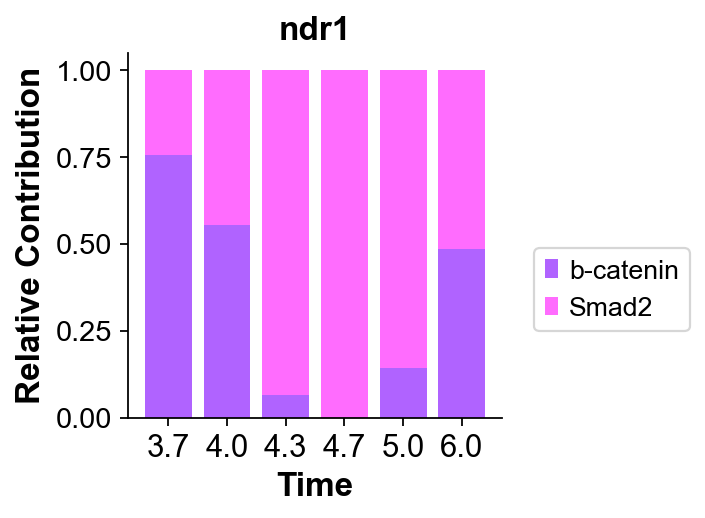

In [442]:
fig, ax = plt.subplots(1, 1, figsize=[3,3])
plt.bar(range(6), 
        np.array(all_adj1)[:,0],
        bottom=np.zeros(len(plot_t['time'])),

        label='b-catenin',width=0.8,#edgecolor='black',
        fc = '#B063FF')

plt.bar(range(6), 
        np.array(all_adj1)[:,1],
        bottom=np.array(all_adj1)[:,0],
        label='Smad2',width=0.8,#edgecolor='black',
        fc = '#FF6CFE')



plt.legend(bbox_to_anchor=(1.05, 0.5), ncol=1,fontsize=12)

plt.grid(False)

#绘制图像标题
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('ndr1',fontsize=15,fontweight='bold')

#设置横纵标题
plt.ylabel('Relative Contribution',fontsize=15,fontweight='bold')                   
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.xticks(range(6),[3.7,4.0,4.3,4.7,5.0,6.0],fontsize=14)
plt.yticks(fontsize=13)
plt.savefig("Fig_ndr1_12.png",dpi=300,bbox_inches = 'tight')

In [415]:
res_pd=pd.DataFrame(columns=['params','coef','pvalue','time'])
for i in [3.7,4.0,4.3,4.7,5.0,6.0]:
    res_test=pd.DataFrame()
    y, X = dmatrices('ndr2 ~ A+C', data=fish_data.loc[fish_data['Time']==i], return_type="dataframe")
    model = sm.OLS(y, X)
    res = model.fit()
    res_test['params']=['Intercept','A','C']
    res_test['coef']=res.params.values
    res_test['pvalue']=res.pvalues.values
    res_test['time']=[t for t in [i]*3]
    res_pd=pd.concat([res_pd,res_test],ignore_index=True)
res_pd

,params,coef,pvalue,time
0,Intercept,1731.769362,0.001896,3.7
1,A,2224.850304,0.001078,3.7
2,C,173.302526,0.374381,3.7
3,Intercept,1460.903151,0.083568,4.0
4,A,4161.110273,0.006338,4.0
5,C,-49.714303,0.936189,4.0
6,Intercept,2105.471625,0.028868,4.3
7,A,6600.078938,0.001346,4.3
8,C,1745.111250,0.046522,4.3
9,Intercept,1897.672567,0.379309,4.7


In [417]:
all_adj=value_analysis3(res_pd.loc[(res_pd['params']=='A')]['coef'].values,
               res_pd.loc[(res_pd['params']=='C')]['coef'].values,
               res_pd.loc[(res_pd['params']=='Intercept')]['coef'].values,
              )
np.array(all_adj)[:,0]

array([ 2.27456461,  4.21082458,  6.64979324, 11.38275752,  5.26817294,
        0.12558074])

In [416]:
all_adj1=value_analysis4(res_pd.loc[(res_pd['params']=='A')]['coef'].values,
               res_pd.loc[(res_pd['params']=='C')]['coef'].values,
              )
np.array(all_adj1)[:,0]

array([0.91070688, 1.        , 0.78745926, 0.83013591, 0.54342763,
       0.01836209])

/var/folders/4m/2xw3_2s503s9r616083n7w440000gn/T/ipykernel_2169/428047745.py:61: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cmap,cax=axins,label='-log10(Pvalue)')


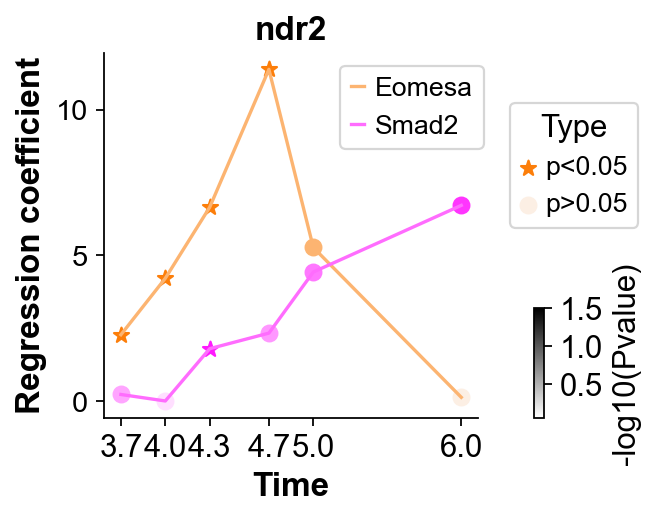

In [428]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import matplotlib.patches as mpatches
#pp=plt.figure(figsize=(4,4))
#用ax控制图片
#ax=pp.add_subplot(1,1,1)

fig, ax = plt.subplots(1, 1, figsize=[3,3])

plot_t=res_pd.loc[(res_pd['params']=='A')]
for xp, yp, m,c in zip(plot_t['time'],np.array(all_adj)[:,0], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    if m=='*':
        s=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=emosa_cmap,vmin=0.05,vmax=1.5,)
    elif m=='o':
        s1=plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=emosa_cmap,vmin=0.05,vmax=1.5,)
plt.plot(plot_t['time'],np.array(all_adj)[:,0],color='#FCB471',label='Eomesa')


plot_t=res_pd.loc[(res_pd['params']=='C')]
for xp, yp, m,c in zip(plot_t['time'],np.array(all_adj)[:,1], 
                       ['*' if i<0.05 else 'o' for i in plot_t['pvalue']],-np.log10(plot_t['pvalue'])):
    plt.scatter(xp, yp, marker=m, s=50,c=c,cmap=smad_cmap,vmin=0.05,vmax=1.5,)
plt.plot(plot_t['time'],np.array(all_adj)[:,1],color='#FF6CFE',label='Smad2')
plt.grid(False)

legend1=ax.legend(bbox_to_anchor=(1.05, 1), ncol=1,fontsize=12)
ax.add_artist(legend1)


names=['p<0.05','p>0.05']
legend2 = ax.legend([s,s1], names,bbox_to_anchor=(1.05, 0.9), ncol=1,fontsize=12,title='Type')

#绘制图像标题
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('ndr2',fontsize=15,fontweight='bold')

#设置横纵标题
plt.ylabel('Regression coefficient',fontsize=15,fontweight='bold')                   
plt.xlabel('Time',fontsize=15,fontweight='bold')

plt.xticks([3.7,4.0,4.3,4.7,5.0,6.0],fontsize=14)
plt.yticks(fontsize=13)

axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="30%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.15, 0., 0.5, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
norm = mpl.colors.Normalize(vmin=0.05, vmax=1.5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='gray_r')
cmap.set_array([])
fig.colorbar(cmap,cax=axins,label='-log10(Pvalue)')
plt.savefig("Fig_ndr2_11.png",dpi=300,bbox_inches = 'tight')

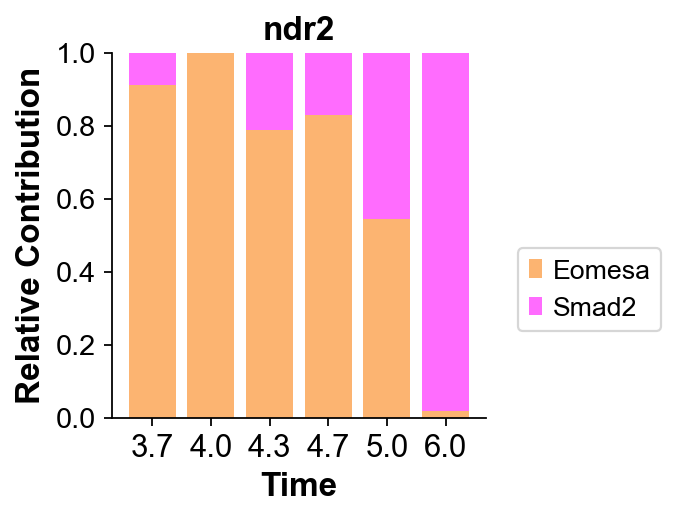

In [430]:
fig, ax = plt.subplots(1, 1, figsize=[3,3])
plt.bar(range(6), 
        np.array(all_adj1)[:,0],
        bottom=np.zeros(len(plot_t['time'])),
        label='Eomesa',width=0.8,#edgecolor='black',
        fc = '#FCB471')

plt.bar(range(6), 
        np.array(all_adj1)[:,1],
        bottom=np.array(all_adj1)[:,0],
        label='Smad2',width=0.8,#edgecolor='black',
        fc = '#FF6CFE')


plt.legend(bbox_to_anchor=(1.05, 0.5), ncol=1,fontsize=12)

plt.grid(False)

#绘制图像标题
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('ndr2',fontsize=15,fontweight='bold')

#设置横纵标题
plt.ylabel('Relative Contribution',fontsize=15,fontweight='bold')                   
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.xticks(range(6),[3.7,4.0,4.3,4.7,5.0,6.0],fontsize=14)
plt.yticks(fontsize=13)
plt.savefig("Fig_ndr2_12.png",dpi=300,bbox_inches = 'tight')